# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
# 
rows = html.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list for storing all the rows:
rows_list = []
# Iterate over each row in the table 
for row in rows:
    # Pull the table data out of each cell in the row:
    cells = row.find_all("td")
    # Make a list to hold the data from each cell in the row:
    data_list = []
    for cell in cells:
        data_list.append(cell.text)
    # Append the row of cell data to our list of rows
    rows_list.append(data_list)

# rows_list is a list of lists.  Let's just pull the first row to verify:
print(rows_list[0])


['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows_list, columns=[\
    "id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]).\
        set_index("id")


In [10]:
# Confirm DataFrame was created successfully
mars_df


,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
# 
# Get the dtype for one of the columns:
# mars_df.sol.dtype
# mars_df['sol'].dtype

# Get the dtypes for all of the columns:
mars_df.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date)
mars_df.sol = mars_df.sol.astype('int')
mars_df.ls = mars_df.ls.astype('int')
mars_df.month = mars_df.month.astype('int')
mars_df.min_temp = mars_df.min_temp.astype('float')
mars_df.pressure = mars_df.pressure.astype('float')

In [13]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes


terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
months_count = mars_df.month.nunique()
print(f"There are {months_count} months in the dataset.")

There are 12 months in the dataset.


In [15]:
# 2. How many Martian days' worth of data are there?
days_count = mars_df.sol.nunique()
print(f"There are {days_count} martian days in the dataset.")

There are 1867 martian days in the dataset.


In [16]:
# 3. What is the average low temperature by month?
average_temperature = mars_df.min_temp.mean()
print(f"The average Martian daily low temperature is {round(average_temperature, 2)}")


The average Martian daily low temperature is -76.12


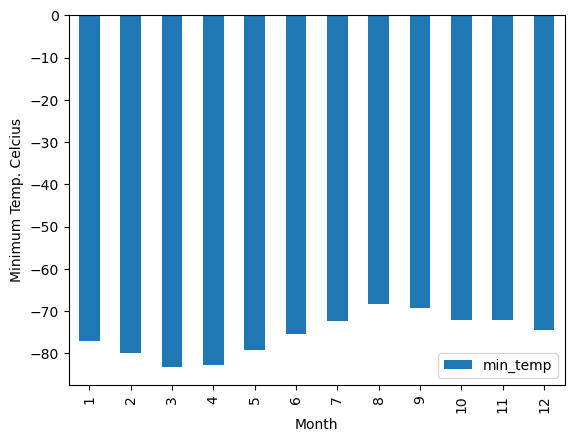

In [17]:
# Plot the average temperature by month
mars_temps_df = mars_df[['month','min_temp']].groupby('month').mean()
# mars_temps_df
ax = mars_temps_df.plot(kind='bar')
ax.set_xlabel("Month")
ax.set_ylabel("Minimum Temp. Celcius")
plt.show()

In [18]:
# Identify the coldest and hottest months in Curiosity's location
# 
# Create a dataframe grouped by month, with the minimum average temperature for each month:
min_temps_df = mars_df[['month','min_temp']].groupby('month').mean()

# Get the month with the minimum temperature:
min = min_temps_df.min_temp.min()

# Get the index corresponding to the month with min value.  This will be our month:
min_month = min_temps_df[min_temps_df['min_temp'] == min].index.values[0]
print(f"The Martian month with the lowest average temperature is month {min_month}.")

The Martian month with the lowest average temperature is month 3.


In [19]:
# Identify the coldest and hottest months in Curiosity's location
# 
# Create a dataframe grouped by month, with the maximum temperature for each month:
max_temps_df = mars_df[['month','min_temp']].groupby('month').mean()
# max_temps_df

# Get the maximum temperature:
max = max_temps_df.min_temp.max()
# Get the index corresponding to the month with max value.  This will be our month:
max_month = max_temps_df[max_temps_df['min_temp'] == max].index.values[0]
print(f"The Martian month with the highest average temperature is month {max_month}.")

The Martian month with the highest average temperature is month 8.


In [20]:
# 4. Average pressure by Martian month
mars_pressure_df = mars_df[['month', 'pressure']].groupby("month").mean()
mars_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


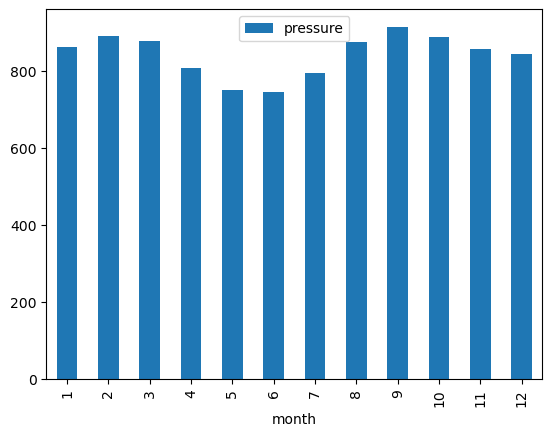

In [21]:
# Plot the average pressure by month
mars_pressure_df.plot.bar()
plt.show()

In [22]:
# Get the minimum average pressure: 
min = mars_pressure_df.pressure.min()
# Get the index corresponding to the month with min value.  This will be our month:
min_month = mars_pressure_df[mars_pressure_df['pressure'] == min].index.values[0]
print(f"The Martian month with the lowest average pressure is month {min_month}.")

The Martian month with the lowest average pressure is month 6.


In [23]:
# Get the maximim average pressure: 
max = mars_pressure_df.pressure.max()
# Get the index corresponding to the month with max value.  This will be our month:
max_month = mars_pressure_df[mars_pressure_df['pressure'] == max].index.values[0]
print(f"The Martian month with the highest average pressure is month {max_month}.")

The Martian month with the highest average pressure is month 9.


peaks = [ 129  138  716 1373 1384]
peak_distances = [  9 578 657  11]


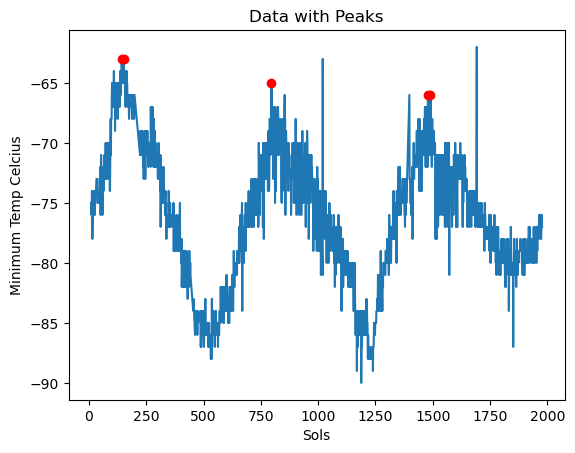

In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the min_temp vs. sols data into a dataframe:
mars_daily_temps_df = mars_df[['sol','min_temp']]

# Identify the peaks in the data using scipy.signal's find_peaks:
peaks, _ = find_peaks(mars_daily_temps_df['min_temp'], prominence=10, width=10)
print(f"peaks = {peaks}")

# Calculate the distance between the identified peak indices:
peak_distances = np.diff(peaks)
print(f"peak_distances = {peak_distances}")

# Plot the data and the identified peaks
fig, ax = plt.subplots()

ax.plot(mars_daily_temps_df['sol'], mars_daily_temps_df['min_temp'])
ax.plot(mars_daily_temps_df['sol'][peaks], mars_daily_temps_df['min_temp'][peaks], 'ro')
ax.set_xlabel('Sols')
ax.set_ylabel('Minimum Temp Celcius')
ax.set_title('Data with Peaks')

plt.show()

This data is rather noisy, but we can see three major peaks in the dataset of 1867 sols, for around 622 sols between peaks.  

A better way to calculate this would be using the solar longitude, which we will do below:

peaks = [ 302  923 1577]
peak_distances = [621 654]


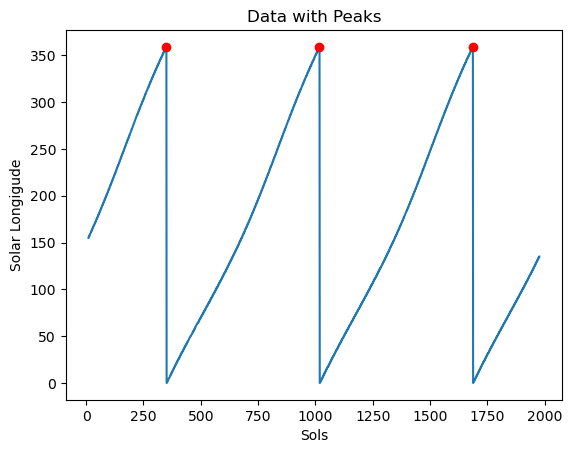

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year? (Take 2)
#
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the min_temp vs. sols data into a dataframe:
mars_solar_longitde_df = mars_df[['sol','ls']]
mars_solar_longitde_df

# Identify the peaks in the data using scipy.signal's find_peaks:
peaks, _ = find_peaks(mars_solar_longitde_df['ls'])
print(f"peaks = {peaks}")

# Calculate the distance between the identified peak indices:
peak_distances = np.diff(peaks)
print(f"peak_distances = {peak_distances}")

# Plot the data and the identified peaks
fig, ax = plt.subplots()

ax.plot(mars_solar_longitde_df['sol'], mars_solar_longitde_df['ls'])
ax.plot(mars_solar_longitde_df['sol'][peaks], mars_solar_longitde_df['ls'][peaks], 'ro')
ax.set_xlabel('Sols')
ax.set_ylabel('Solar Longigude')
ax.set_title('Data with Peaks')

plt.show()

This data is less noisy.  We we can see three major peaks in the dataset, with a distance between peaks of 621 and 654 sols, averaging 638 sols between peaks.  

This differs from what Wikipedia says about the number of sols in a martian year - "approximately 668" sols.  

Upon further investigation, it turns out that there is dataset is missing 110 records.  The number of sols goes up to 1977, but there are only 1867 records in the table.   

To get the correct readings, we'll need to interpolate data for the missing days.  That is done below.  

peaks = [ 339 1007 1676]
peak_distances = [668 669]


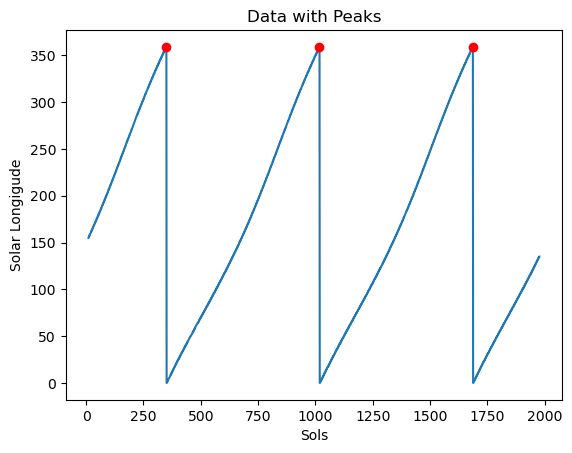

In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?  (Final)
#
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the min_temp vs. sols data into a dataframe:
# mars_daily_temps_df = mars_df[['sol','min_temp']].set_index("sol")
mars_solar_longitde_df = mars_df[['sol','ls']]
# mars_solar_longitde_df

# Get the min and max values for the 'sol' column:
min = mars_solar_longitde_df['sol'].min()
max = mars_solar_longitde_df['sol'].max()

# Reset the index to be sol
mars_solar_longitde_df.set_index('sol', inplace=True)

# Make an np array of of the 'sol' entries from min to max + 1:
complete_sol_range = np.arange(min, max + 1)

# Make a new df with complete range of sol entries:
complete_df = pd.DataFrame(index=complete_sol_range)

# Merge the two data frames:
merged_df = complete_df.merge(mars_solar_longitde_df, left_index=True, right_index=True, how='left')

# Interpolate the missing values from the original dataframe:
merged_df['ls_interp'] = merged_df['ls'].interpolate()

# Reset the index:
merged_df.reset_index(inplace=True)
merged_df.rename(columns={'index': 'sol'}, inplace=True)

# Identify the peaks in the data using scipy.signal's find_peaks:
peaks, _ = find_peaks(merged_df['ls_interp'])
print(f"peaks = {peaks}")

# Calculate the distance between the identified peak indices:
peak_distances = np.diff(peaks)
print(f"peak_distances = {peak_distances}")

# Plot the data and the identified peaks:
fig, ax = plt.subplots()

ax.plot(merged_df['sol'], merged_df['ls_interp'])
ax.plot(merged_df['sol'][peaks], merged_df['ls_interp'][peaks], 'ro')
ax.set_xlabel('Sols')
ax.set_ylabel('Solar Longigude')
ax.set_title('Data with Peaks')

plt.show()

According to this data, a martian year 668-669 sols, which corresponds to the Wikipedia article stating that a Martian year has approximately 668 sols.  

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
mars_df.to_csv("mars.csv")

In [28]:
browser.quit()